In [1]:
%matplotlib inline

Importing data and reading it to a pandas dataframe

In [2]:
# Importing packages and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Read data
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Question Number 1: 
Part A: Effect of age on Heart disease (Lucas Perez)

In [3]:
# Understand data and trying to find the number of individuals in the dataset with heart disease
heart_disease_count = data['HeartDisease'].value_counts()
 
print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


### Summary description for Age and Heart Statistics

In [4]:
age_groups = data['AgeCategory'].value_counts()
print("These are the different age groups:", age_groups)

These are the different age groups: AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


Cleaning and grouping data to plot the relation between Age and Heart Disease

<Figure size 1000x600 with 0 Axes>

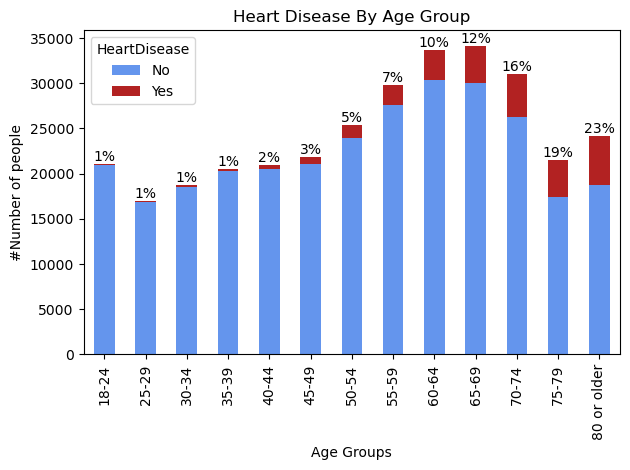

In [5]:
# Group Data by 'AgeGroup' and "HeartDisease' columns
grouped_data_agehd = data.groupby(["AgeCategory", "HeartDisease"]).size().unstack(fill_value=0)
TotalCountPerCategory = grouped_data_agehd.sum(axis=1)

# Calculate percentage of individuals with heart disease within each general health category
grouped_data_agehd['Heart Disease Percentage'] = (grouped_data_agehd['Yes'] / TotalCountPerCategory) * 100

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
axx = grouped_data_agehd[['No', 'Yes']].plot(kind='bar', stacked=True, color=['cornflowerblue', 'firebrick'])

# Add percentage labels on the bars
for x, (no_count, yes_count) in enumerate(zip(grouped_data_agehd['No'], grouped_data_agehd['Yes'])):
    total_count = no_count + yes_count
    plt.text(x, no_count + yes_count, f"{yes_count / total_count * 100:.0f}%", ha='center', va='bottom', color='black')

# Add labels, title, etc.
plt.xlabel('Age Groups')
plt.ylabel('#Number of people')
plt.title('Heart Disease By Age Group')
plt.tight_layout()
plt.savefig('output/Heart_Disease_Distribution_By_AgeGroup_Lucas.png', bbox_inches='tight')
plt.show()

Question Number 1: 
Part B: Effect of gender on Heart disease (Lucas Perez)

Cleaning the data for the plot of relationship between Gender and Heart Disease

In [6]:
# Cleaning the starter data on the Heart disease column in the dataset
cleanedyes_data= data[data['HeartDisease'] == 'Yes']
cleanedyes_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


Summary description for Gender and Heart Disease

In [7]:
# Calculate counts for males and females w/ and w/o heart disease
males_yeshd= data[(data['Sex'] == 'Male') & (data['HeartDisease'] == 'Yes')].shape[0]
females_yeshd= data[(data['Sex'] == 'Female') & (data['HeartDisease'] == 'Yes')].shape[0]
males_nohd= data[(data['Sex'] == 'Male') & (data['HeartDisease'] == 'No')].shape[0]
females_nohd= data[(data['Sex'] == 'Female') & (data['HeartDisease'] == 'No')].shape[0]

In [8]:
print(f"Number of Males who have heart disease: {males_yeshd}")
print(f"Number of Males who donot have heart disease: {males_nohd}")
print(f"Number of Females who have heart disease: {females_yeshd}")
print(f"Number of Females who have heart disease: {females_nohd}")

Number of Males who have heart disease: 16139
Number of Males who donot have heart disease: 135851
Number of Females who have heart disease: 11234
Number of Females who have heart disease: 156571


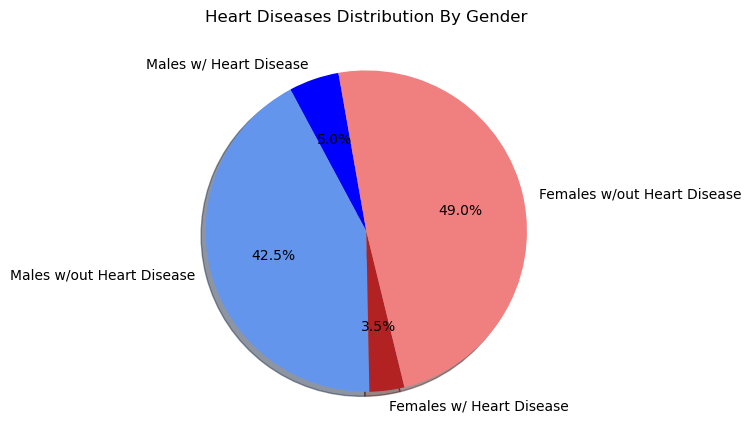

In [9]:
# Prepare Pie graph
labels_sex = ["Males w/ Heart Disease", "Males w/out Heart Disease","Females w/ Heart Disease", "Females w/out Heart Disease"]
sizes_sex = [males_yeshd, males_nohd, females_yeshd,females_nohd]
colors_sex = ["blue","cornflowerblue","firebrick","lightcoral"]

# Plotting difference between males and females with heart disease
plt.pie(sizes_sex, labels=labels_sex, colors=colors_sex, autopct="%1.1f%%", shadow=True,startangle=100)
# Create axes which are equal so we have a perfect circle
plt.title('Heart Diseases Distribution By Gender')
plt.tight_layout()
plt.savefig('output/HeartDiseaseDistributionByGender_Lucas.png', bbox_inches='tight')
plt.show()

Question Number 2: 
Part A: Effect of Race on Heart disease (Halima Saleh)

HeartDisease                        No    Yes  Heart Disease%
Race                                                         
American Indian/Alaskan Native    4660    542           10.42
Asian                             7802    266            3.30
Black                            21210   1729            7.54
Hispanic                         26003   1443            5.26
Other                            10042    886            8.11
White                           222705  22507            9.18


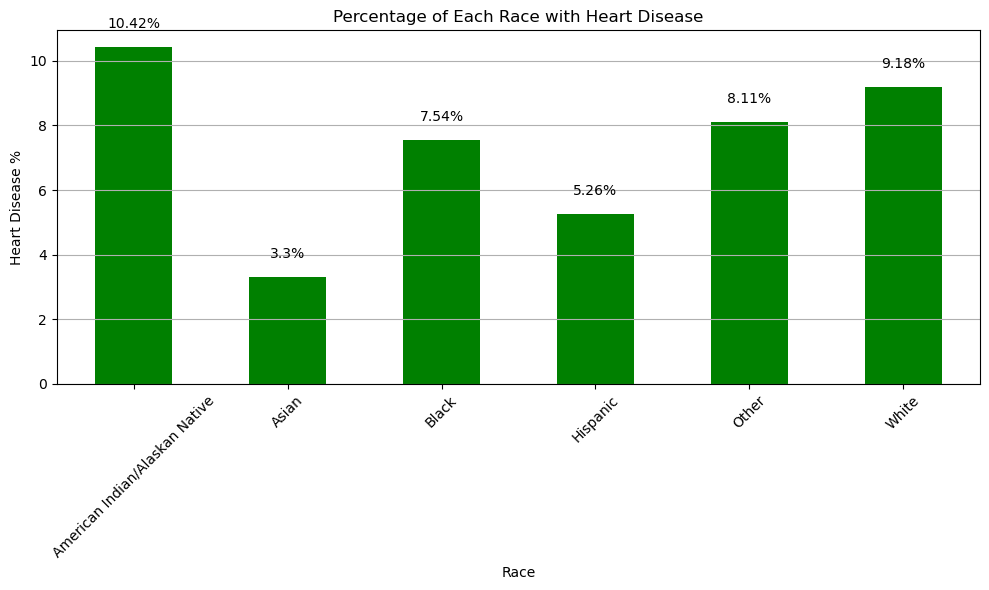

In [10]:
# counting the individual races
race_counts = data.groupby('Race').size()

# Group by Race and Heart Disease
race_vs_heart = data.groupby(['Race', 'HeartDisease']).size().unstack(fill_value=0)

# Calculate percentage of individuals with heart disease for each race group
race_vs_heart['Heart Disease%'] = round((race_vs_heart['Yes'] / race_counts) * 100, 2)
print(race_vs_heart)
# Save DataFrame to CSV
race_vs_heart.to_csv("output/Race_vs_HeartDisease.csv")

plt.figure(figsize=(10, 6))
ax = race_vs_heart['Heart Disease%'].plot(kind='bar', color='Green')

plt.xlabel('Race')
plt.ylabel('Heart Disease %')
plt.title('Percentage of Each Race with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height}%", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("output/Race_vs_HeartDisease_Halima.png", bbox_inches='tight')
plt.show()

### Summary Statistics for Race with respect to Heart Disease

In [11]:
total_cases = race_vs_heart.sum()

# Mean number of heart disease cases across all racial groups
mean_race = race_vs_heart.mean()

# Median number of heart disease cases across all racial groups
median_rase = race_vs_heart.median()

# Standard deviation of heart disease cases across all racial groups
std_race = race_vs_heart.std()

# Summary statistics DataFrame
summary_statistics = pd.DataFrame({
    'Total Races': total_cases,
    'Mean': mean_race ,
    'Median': median_rase ,
    'Std Deviation': std_race
})

print(summary_statistics)

                Total Races          Mean     Median  Std Deviation
HeartDisease                                                       
No                292422.00  48737.000000  15626.000   85621.486425
Yes                27373.00   4562.166667   1164.500    8808.019832
Heart Disease%        43.81      7.301667      7.825       2.613200


Question Number 2: 
Part B: Effect of Physical Health on Heart Disease (Halima Saleh)

HeartDisease          No    Yes  Heart Disease Percentage
PhysicalCategory                                         
Excellent         247510  17533                  6.615153
Very Good          12918   1691                 11.575056
Good                7854   1273                 13.947628
Fair                4445   1014                 18.574831
Poor                3262    782                 19.337290
Bad                 1543    461                 23.003992


<Figure size 1000x600 with 0 Axes>

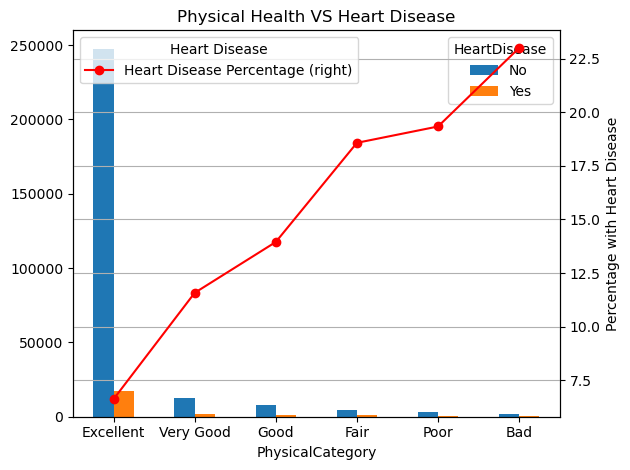

In [12]:
# Define bins and labels for physical health
bins_Physical = [0, 5, 10, 15, 20, 25, 30]
labels_Physical = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Bad']
# Binning based on the categorical division in the original CDC survey (see link in the Readme)

# Bin the 'PhysicalHealth' column
data['PhysicalCategory'] = pd.cut(data['PhysicalHealth'], bins=bins_Physical, labels=labels_Physical, right=False)

# Group by 'PhysicalCategory' and 'HeartDisease' and count
Physical_vs_Health = data.groupby(['PhysicalCategory', 'HeartDisease'], observed=True).size().unstack(fill_value=0)
total_count_per_category = Physical_vs_Health.sum(axis=1)

# Calculate percentage of individuals with heart disease within each physical health category
Physical_vs_Health['Heart Disease Percentage'] = (Physical_vs_Health['Yes'] / total_count_per_category) * 100

print(Physical_vs_Health)
Physical_vs_Health.to_csv("output/Physical_vs_HeartDisease.csv")

plt.figure(figsize=(10, 6))
ax = Physical_vs_Health[['No', 'Yes']].plot(kind='bar', stacked=False)
Physical_vs_Health['Heart Disease Percentage'].plot(kind='line', marker='o', color='red', secondary_y=True)

# Add labels and title for the bar chart
plt.xlabel('Physical Health Category')
plt.ylabel('Number of Patients')
plt.title('Physical Health VS Heart Disease')

# Add labels and title for the line chart
plt.ylabel('Percentage with Heart Disease')
plt.legend(title='Heart Disease', loc='upper left')
plt.grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output/Physical_vs_heartdisease_Halima.png", bbox_inches='tight')
plt.show()

### Summary stastics for physical health vs Heart disease

In [13]:
total_cases = Physical_vs_Health.sum()

# Mean number of heart disease cases across all racial groups
mean_phy = Physical_vs_Health.mean()

# Median number of heart disease cases across all racial groups
median_phy = Physical_vs_Health.median()

# Standard deviation of heart disease cases across all racial groups
std_phy = Physical_vs_Health.std()

# Summary statistics DataFrame
summary_statisticsPhy = pd.DataFrame({
    'Total Cases': total_cases,
    'Mean': mean_phy,
    'Median': median_phy,
    'Std Deviation ': std_phy
})

print(summary_statisticsPhy)

                           Total Cases          Mean       Median  \
HeartDisease                                                        
No                        277532.00000  46255.333333  6149.500000   
Yes                        22754.00000   3792.333333  1143.500000   
Heart Disease Percentage      93.05395     15.508992    16.261229   

                          Std Deviation   
HeartDisease                              
No                          98676.445505  
Yes                          6744.591720  
Heart Disease Percentage        5.953895  


Question Number 2 : 
Part C : Effect of General Health on Heart disease (Halima Saleh)

HeartDisease      No   Yes  Heart Disease Percentage
GenHealth                                           
Excellent      65342  1500                  2.244098
Fair           27593  7084                 20.428526
Good           83571  9558                 10.263183
Poor            7439  3850                 34.103995
Very good     108477  5381                  4.726062


<Figure size 1000x600 with 0 Axes>

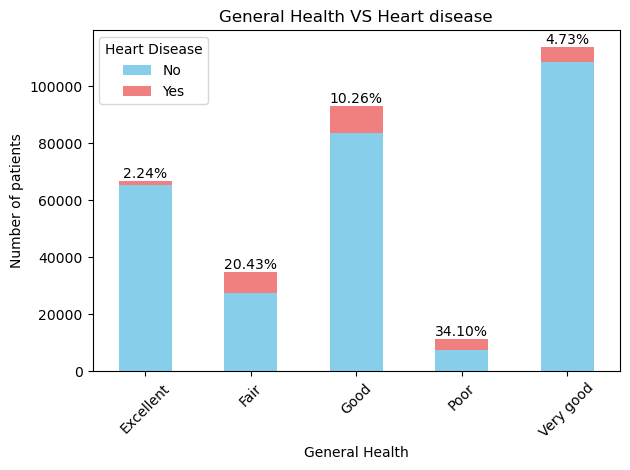

In [14]:
Gen_vs_HeartDisease = data.groupby(['GenHealth', 'HeartDisease']).size().unstack(fill_value=0)
total_count_per_category = Gen_vs_HeartDisease.sum(axis=1)

# Calculate percentage of individuals with heart disease within each general health category
Gen_vs_HeartDisease['Heart Disease Percentage'] = (Gen_vs_HeartDisease['Yes'] / total_count_per_category) * 100
print(Gen_vs_HeartDisease)
# Save DataFrame to CSV
Gen_vs_HeartDisease.to_csv("output/General_vs_HeartDisease.csv")
# Plotting
plt.figure(figsize=(10, 6))
ax = Gen_vs_HeartDisease[['No', 'Yes']].plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add percentage labels on the bars
for x, (no_count, yes_count) in enumerate(zip(Gen_vs_HeartDisease['No'], Gen_vs_HeartDisease['Yes'])):
    total_count = no_count + yes_count
    plt.text(x, no_count + yes_count, f"{yes_count / total_count * 100:.2f}%", ha='center', va='bottom', color='black')

# Add labels and title for the chart
plt.xlabel('General Health')
plt.ylabel('Number of patients')
plt.title('General Health VS Heart disease')

plt.xticks(rotation=45)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.savefig("output/General_vs_heartdisease_Halima.png", bbox_inches='tight')
plt.show()

### Summary stastics for General Heath vs Heart disease

In [15]:
total_cases = Gen_vs_HeartDisease.sum()

# Mean number of heart disease cases across all racial groups
mean_gen = Gen_vs_HeartDisease.mean()

# Median number of heart disease cases across all racial groups
median_gen = Gen_vs_HeartDisease.median()

# Standard deviation of heart disease cases across all racial groups
std_gen = Gen_vs_HeartDisease.std()

# Summary statistics DataFrame
summary_statisticsGen = pd.DataFrame({
    'Total Cases': total_cases,
    'Mean': mean_gen,
    'Median': median_gen,
    'Std Deviation ': std_gen
})

print(summary_statisticsGen)

                            Total Cases          Mean        Median  \
HeartDisease                                                          
No                        292422.000000  58484.400000  65342.000000   
Yes                        27373.000000   5474.600000   5381.000000   
Heart Disease Percentage      71.765865     14.353173     10.263183   

                          Std Deviation   
HeartDisease                              
No                          41035.154707  
Yes                          3070.417529  
Heart Disease Percentage       13.067554  


Question Number 3: Effect of Sleep time on Heart Disease (Harshh Patel)

In [16]:
# Creating a dataframe containing the sleep times responses
all_sleep_times = data["SleepTime"].value_counts().sort_index()
all_sleep_times_df = pd.DataFrame(all_sleep_times).reset_index()
all_sleep_times_df

,SleepTime,count
0,1.0,551
1,2.0,788
2,3.0,1992
3,4.0,7750
4,5.0,19184
5,6.0,66721
6,7.0,97751
7,8.0,97602
8,9.0,16041
9,10.0,7796


Plotting the relationship of Sleep times VS Heart Disease

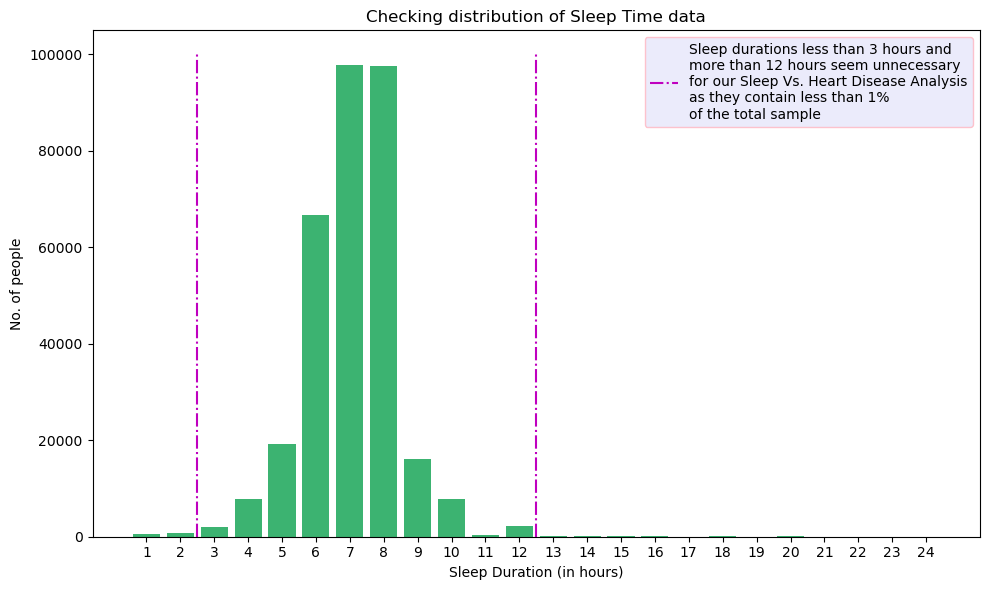

In [17]:
plt.figure(figsize= (10,6))
plt.bar(all_sleep_times_df["SleepTime"], all_sleep_times_df["count"], color="mediumseagreen")
plt.xticks(all_sleep_times_df["SleepTime"])
plt.xlabel("Sleep Duration (in hours)")
plt.ylabel("No. of people")
plt.title("Checking distribution of Sleep Time data")
plt.vlines(x=(2.5, 12.5), ymin=1, ymax=99999, colors= "m", linestyles="dashdot", label="Sleep durations less than 3 hours and\nmore than 12 hours seem unnecessary\nfor our Sleep Vs. Heart Disease Analysis\nas they contain less than 1%\nof the total sample")
plt.legend(loc= "upper right", facecolor= "lavender", edgecolor= "lightpink")
plt.tight_layout()
plt.savefig("output/Checking_distribution_of_Sleep_Time_data_Harshh.png", bbox_inches='tight')
plt.show()

In [18]:
# list of sleep times to be discarded which contain less than 1% of the sample size.
discard_sleep_times = [1.0, 2.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

Data Cleanup for Sleep time vs Heart Disease relationship

In [19]:
# cleaning data by removing data relating to suspicious or insignificant sleep times by using the negation mark '~' along with the .isin function
cleaned_sleep_data = data[~data["SleepTime"].isin(discard_sleep_times)]
cleaned_sleep_data["SleepTime"].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10.,  3., 11.])

2,338 rows of insignificant data removed

In [20]:
only_sleep_data = cleaned_sleep_data[["HeartDisease", "SleepTime"]]
only_sleep_data.head()

,HeartDisease,SleepTime
0,No,5.0
1,No,7.0
2,No,8.0
3,No,6.0
4,No,8.0


In [21]:
sleep_time_series = only_sleep_data["SleepTime"].value_counts()
sleep_df1 = pd.DataFrame(sleep_time_series).sort_index().rename(columns={"count": "No. of people"})
sleep_df1

,No. of people
SleepTime,
3.0,1992
4.0,7750
5.0,19184
6.0,66721
7.0,97751
8.0,97602
9.0,16041
10.0,7796
11.0,415


In [22]:
abc = only_sleep_data.groupby(["SleepTime"], as_index=False).value_counts()
sleep_df2 = pd.DataFrame(abc)
sleep_df2

,SleepTime,HeartDisease,count
0,3.0,No,1645
1,3.0,Yes,347
2,4.0,No,6570
3,4.0,Yes,1180
4,5.0,No,17154
5,5.0,Yes,2030
6,6.0,No,61294
7,6.0,Yes,5427
8,7.0,No,91426
9,7.0,Yes,6325


In [23]:
sleep_df2_yes = sleep_df2[sleep_df2["HeartDisease"]=="Yes"]
sleep_df2_yes = sleep_df2_yes[["SleepTime", "count"]].rename(columns={"count":"No. of people having Heart Disease"}).set_index(["SleepTime"])
sleep_df2_yes

,No. of people having Heart Disease
SleepTime,
3.0,347
4.0,1180
5.0,2030
6.0,5427
7.0,6325
8.0,8358
9.0,1696
10.0,1165
11.0,73


In [24]:
sleep_df2_no = sleep_df2[sleep_df2["HeartDisease"]=="No"]
sleep_df2_no = sleep_df2_no[["SleepTime", "count"]].rename(columns={"count":"No. of people NOT having Heart Disease"}).set_index(["SleepTime"])
sleep_df2_no

,No. of people NOT having Heart Disease
SleepTime,
3.0,1645
4.0,6570
5.0,17154
6.0,61294
7.0,91426
8.0,89244
9.0,14345
10.0,6631
11.0,342


In [25]:
sleep_df = pd.merge(sleep_df2_yes, sleep_df2_no, how='outer', on="SleepTime")
sleep_df = pd.merge(sleep_df, sleep_df1, how='outer', on="SleepTime")
sleep_df

,No. of people having Heart Disease,No. of people NOT having Heart Disease,No. of people
SleepTime,,,
3.0,347,1645,1992
4.0,1180,6570,7750
5.0,2030,17154,19184
6.0,5427,61294,66721
7.0,6325,91426,97751
8.0,8358,89244,97602
9.0,1696,14345,16041
10.0,1165,6631,7796
11.0,73,342,415


In [26]:
sleep_df["Percentage of people having Heart Disease"] = round((sleep_df["No. of people having Heart Disease"]/sleep_df["No. of people"])*100, 2)
sleep_df["Percentage of people NOT having Heart Disease"] = round((sleep_df["No. of people NOT having Heart Disease"]/sleep_df["No. of people"])*100, 2)
sleep_df

,No. of people having Heart Disease,No. of people NOT having Heart Disease,No. of people,Percentage of people having Heart Disease,Percentage of people NOT having Heart Disease
SleepTime,,,,,
3.0,347,1645,1992,17.42,82.58
4.0,1180,6570,7750,15.23,84.77
5.0,2030,17154,19184,10.58,89.42
6.0,5427,61294,66721,8.13,91.87
7.0,6325,91426,97751,6.47,93.53
8.0,8358,89244,97602,8.56,91.44
9.0,1696,14345,16041,10.57,89.43
10.0,1165,6631,7796,14.94,85.06
11.0,73,342,415,17.59,82.41


In [27]:
final_sleep_df = sleep_df[["Percentage of people having Heart Disease", "Percentage of people NOT having Heart Disease"]]
final_sleep_df

,Percentage of people having Heart Disease,Percentage of people NOT having Heart Disease
SleepTime,,
3.0,17.42,82.58
4.0,15.23,84.77
5.0,10.58,89.42
6.0,8.13,91.87
7.0,6.47,93.53
8.0,8.56,91.44
9.0,10.57,89.43
10.0,14.94,85.06
11.0,17.59,82.41


Plotting the stacked bar plot of Sleep time vs Heart Disease

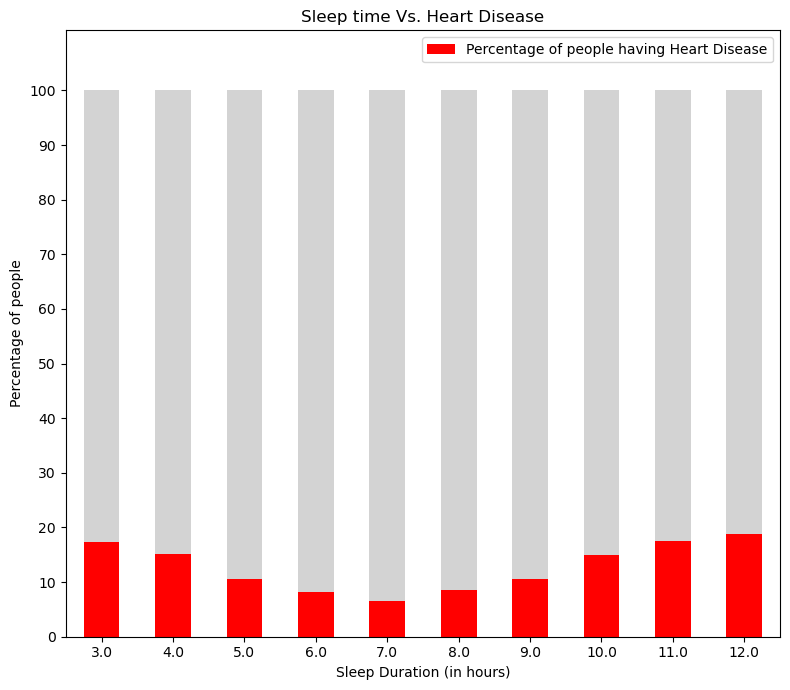

In [28]:
y_axis = [0,10,20,30,40,50,60,70,80,90,100]
Sleep_plot = final_sleep_df.plot(kind="bar", 
                                 stacked=True, 
                                 figsize=(8,7),
                                 ylim=(0,111),
                                 title="Sleep time Vs. Heart Disease",
                                 xlabel= "Sleep Duration (in hours)",
                                 rot= 0,
                                 yticks= y_axis,
                                 ylabel= "Percentage of people", 
                                 color=("red", "lightgray"))
Sleep_plot.legend(["Percentage of people having Heart Disease"],)
plt.tight_layout()
plt.savefig("output/Sleep_Vs._Heart_Disease_Harshh.png", bbox_inches='tight')
plt.show()

Question Number 4: Effect of Lifestyle (Smoking and Alcohol Consumption) on Heart Disease (Suad Godax)

In [29]:
# Calculate the total number of smokers and non smokers
Smoking = pd.DataFrame(data['Smoking']).value_counts()
Smoking

Smoking
No         187887
Yes        131908
Name: count, dtype: int64

In [30]:
Smokers = data.groupby(['Smoking', 'HeartDisease']).size()
Smokers

Smoking  HeartDisease
No       No              176551
         Yes              11336
Yes      No              115871
         Yes              16037
dtype: int64

In [31]:
Smokers_df = pd.DataFrame(Smokers)
Smokers_df

0
Smoking HeartDisease        
No      No            176551
        Yes            11336
Yes     No            115871
        Yes            16037

In [32]:
label_dict_smoking = {'No':{'No':'Doesnot smoke, Does not have Heart Disease',
                    'Yes':'Doesnot smoke, Have Heart Disease'},
              'Yes':{'No':'Smokes, Doesnot have Heart Disease',
                     'Yes':'Smokes, Have Heart Disease'}}
label_dict_smoking

{'No': {'No': 'Doesnot smoke, Does not have Heart Disease',
  'Yes': 'Doesnot smoke, Have Heart Disease'},
 'Yes': {'No': 'Smokes, Doesnot have Heart Disease',
  'Yes': 'Smokes, Have Heart Disease'}}

In [33]:
Smokers_df.reset_index(inplace=True)
Smokers_df

,Smoking,HeartDisease,0
0,No,No,176551
1,No,Yes,11336
2,Yes,No,115871
3,Yes,Yes,16037


In [34]:
Smokers_df['label'] = Smokers_df.apply(lambda x: label_dict_smoking[x['Smoking']][x['HeartDisease']], axis=1)
Smokers_df

,Smoking,HeartDisease,0,label
0,No,No,176551,"Doesnot smoke, Does not have Heart Disease"
1,No,Yes,11336,"Doesnot smoke, Have Heart Disease"
2,Yes,No,115871,"Smokes, Doesnot have Heart Disease"
3,Yes,Yes,16037,"Smokes, Have Heart Disease"


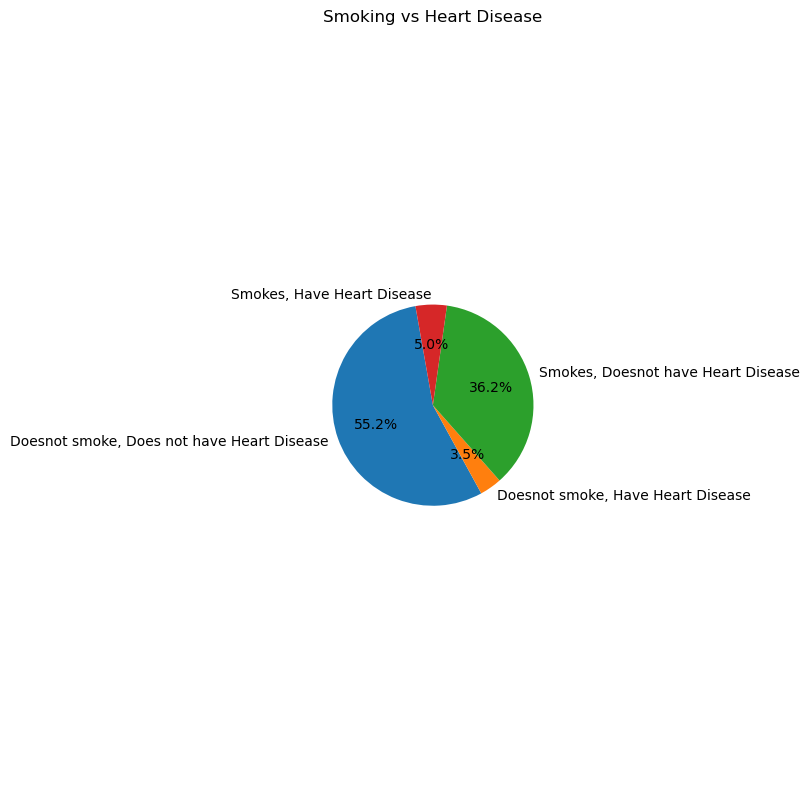

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(Smokers, labels=Smokers_df['label'], autopct='%1.1f%%', startangle=100)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Smoking vs Heart Disease')
plt.tight_layout()
plt.savefig("output/Smoking_Vs._Heart_Disease_Suad.png", bbox_inches='tight')
plt.show()

Plotting bar garph between variables Alcohol and Heart Disease

In [36]:
# Rename AlcoholDrinking to "Alcohol"
Heart_Disease_df = data.rename(columns={"AlcoholDrinking": "Alcohol"})
Heart_Disease_df.head()

,HeartDisease,BMI,Smoking,Alcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,PhysicalCategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Excellent
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Excellent
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Poor
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Excellent
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Bad


In [37]:
# Calculate the total of Alcohol consumers and non alcohol consumers
Alcohol = pd.DataFrame(Heart_Disease_df['Alcohol']).value_counts()
Alcohol

Alcohol
No         298018
Yes         21777
Name: count, dtype: int64

In [38]:
Alcohol = Heart_Disease_df.groupby(['Alcohol', 'HeartDisease']).size()
Alcohol

Alcohol  HeartDisease
No       No              271786
         Yes              26232
Yes      No               20636
         Yes               1141
dtype: int64

In [39]:
Alcohol_df = pd.DataFrame(Alcohol)
Alcohol_df

0
Alcohol HeartDisease        
No      No            271786
        Yes            26232
Yes     No             20636
        Yes             1141

In [40]:
label_dict_Alcohol = {'No':{'No':'Doesnot consume Alcohol, Does not have Heart Disease',
                    'Yes':'Doesnot consume Alcohol, Have Heart Disease'},
              'Yes':{'No':'Consumes Alcohol, Doesnot have Heart Disease',
                     'Yes':'Consumes Alcohol, Have Heart Disease'}}
label_dict_Alcohol

{'No': {'No': 'Doesnot consume Alcohol, Does not have Heart Disease',
  'Yes': 'Doesnot consume Alcohol, Have Heart Disease'},
 'Yes': {'No': 'Consumes Alcohol, Doesnot have Heart Disease',
  'Yes': 'Consumes Alcohol, Have Heart Disease'}}

In [41]:
Alcohol_df.reset_index(inplace=True)
Alcohol_df

,Alcohol,HeartDisease,0
0,No,No,271786
1,No,Yes,26232
2,Yes,No,20636
3,Yes,Yes,1141


In [42]:
column = Alcohol_df.columns
print(column)

Index(['Alcohol', 'HeartDisease', 0], dtype='object')


In [43]:
Alcohol_df.rename(columns={0: 'Counts'}, inplace=True)
Alcohol_df.columns

Index(['Alcohol', 'HeartDisease', 'Counts'], dtype='object')

In [44]:
Alcohol_df['label'] = Alcohol_df.apply(lambda x: label_dict_Alcohol[x['Alcohol']][x['HeartDisease']], axis=1)
Alcohol_df

,Alcohol,HeartDisease,Counts,label
0,No,No,271786,"Doesnot consume Alcohol, Does not have Heart D..."
1,No,Yes,26232,"Doesnot consume Alcohol, Have Heart Disease"
2,Yes,No,20636,"Consumes Alcohol, Doesnot have Heart Disease"
3,Yes,Yes,1141,"Consumes Alcohol, Have Heart Disease"


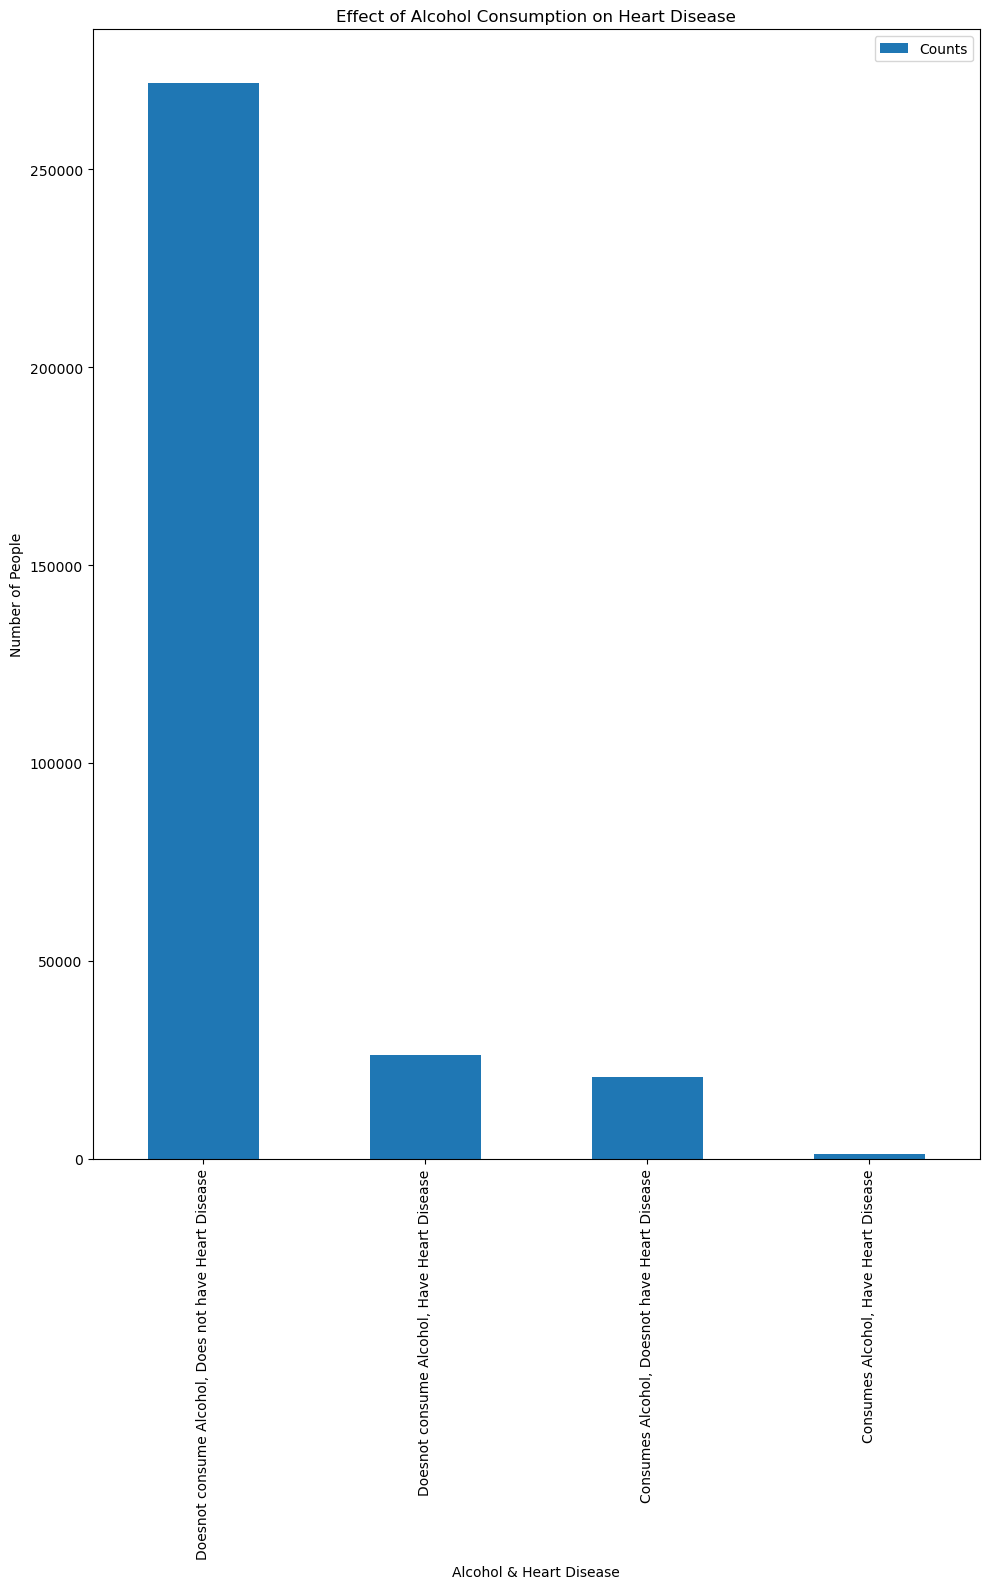

In [45]:

Alcohol_df.plot(x='label', 
                y='Counts', 
                kind='bar',
                figsize=(10,16),
                xlabel= "Alcohol & Heart Disease",
                ylabel= "Number of People",
                title='Effect of Alcohol Consumption on Heart Disease',
                
                )
plt.tight_layout()
plt.savefig("output/Alcohol_Vs._Heart_Disease_Suad.png", bbox_inches='tight')
plt.show()